In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
trainX = pd.read_csv("/content/sample_data/mnist_train_small.csv",header=None)

In [3]:
trainX.shape

(20000, 785)

In [4]:
trainX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
testX = pd.read_csv("/content/sample_data/mnist_test.csv",header=None)

In [6]:
testX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
testX.shape

(10000, 785)

In [0]:
label = trainX.iloc[:,0]

In [9]:
label.value_counts()

1    2243
7    2126
6    2039
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

In [0]:
train_df = trainX.iloc[:,1:]

In [11]:
train_df.shape

(20000, 784)

## plot the some label

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


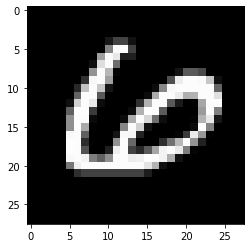

6


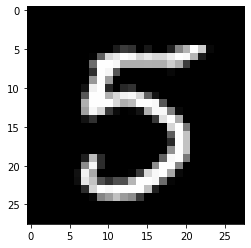

5


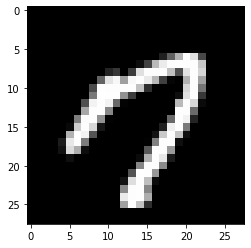

7


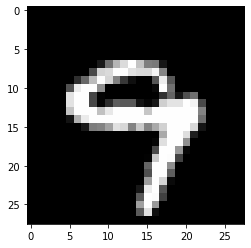

9


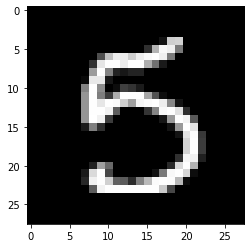

5


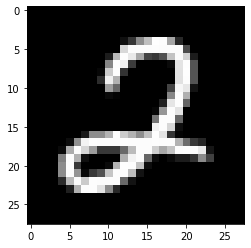

2


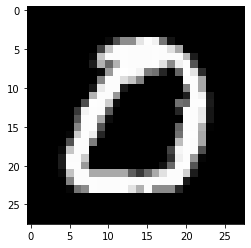

0


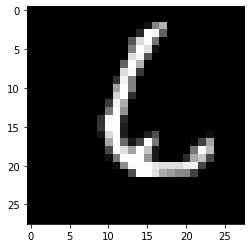

6


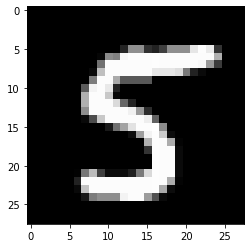

5


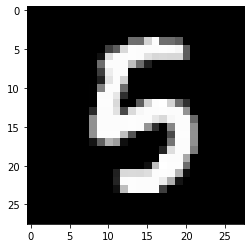

5


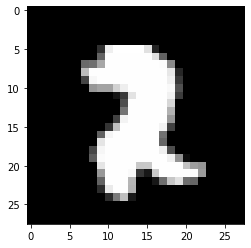

2


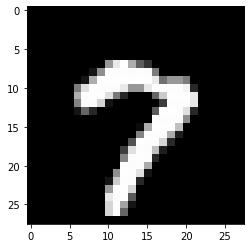

7


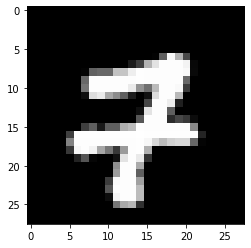

7


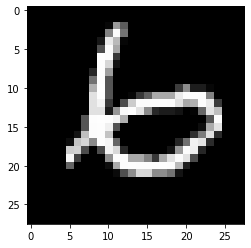

6


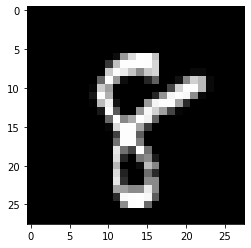

8


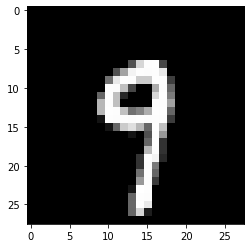

9


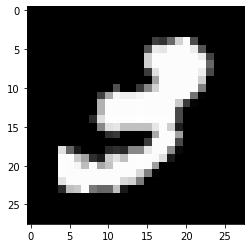

3


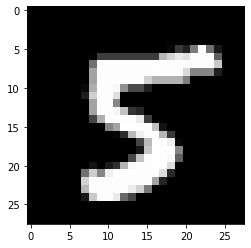

5


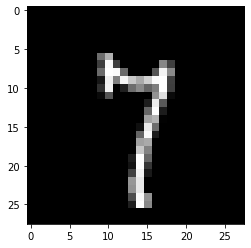

7


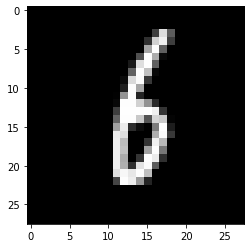

6


In [12]:
n = 20
for idx in range(n):
    grid_data = train_df.iloc[idx].as_matrix().reshape(28,28)
    plt.imshow(grid_data,interpolation = "none",cmap = "gray")
    plt.show()
    print(label[idx])

## Normalizing the Data

In [0]:
from sklearn.preprocessing import StandardScaler


In [14]:
train_df.shape

(20000, 784)

In [0]:
def nomalization(train_df):
    X_std = StandardScaler().fit_transform(train_df)
    X_mean = np.mean(X_std, axis=0)
    # Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    return X_std, X_mean, X_cov

In [0]:
X_std, X_mean, X_cov = nomalization(train_df)

In [0]:
A  = np.asmatrix(X_std)

In [18]:
A

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
A.shape

(20000, 784)

## Covariance matirx

In [20]:
X_cov = np.asmatrix(X_cov)
X_cov

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X_cov.shape

(784, 784)

# Eigen_values an Eigen Vector

In [22]:
eigen_value,eig_vec = np.linalg.eig(X_cov)
print("Eigenvals shape: "+str(eigen_value.shape))
print("Eigenvecs shape: "+str(eig_vec.shape))

Eigenvals shape: (784,)
Eigenvecs shape: (784, 784)


# Sort eigen values according to index

In [0]:
Index = [i for i in range(len(eigen_value))]

In [0]:
def Bobble_Sort(eigen_value, Index):
    for i in range(len(eigen_value)-1):
        for j in range(len(eigen_value)-i-1):
            if eigen_value[j]< eigen_value[j+1]:
                temp = eigen_value[j]
                eigen_value[j] = eigen_value[j+1]
                eigen_value[j+1] = temp
                
                temp = Index[j]
                Index[j] = Index[j+1]
                Index[j+1] = temp
    return eigen_value,Index  

In [0]:
Eigen_Values , index1 = Bobble_Sort(eigen_value, Index)

In [26]:
Eigen_Values.shape

(784,)

# Sort the Eigen vector According to sorted eigen vector of index

In [27]:
Eigen_Vectors = eig_vec[:,index1]
Eigen_Vectors.shape

(784, 784)

In [0]:
Error = []

In [0]:
for i in range(784):
    col = Eigen_Vectors[:,0:i+1]
    Matrix_G = np.asmatrix(col)
    Transpose_Matrix_G = np.transpose(Matrix_G)
    Transpose_Matrix_G_into_Mat_A = np.matmul(Transpose_Matrix_G,A.T)
    Mean = np.matmul(Matrix_G,Transpose_Matrix_G_into_Mat_A)
    Fobinus_norm = np.linalg.norm(A-Mean.T)
    Error.append(Fobinus_norm)

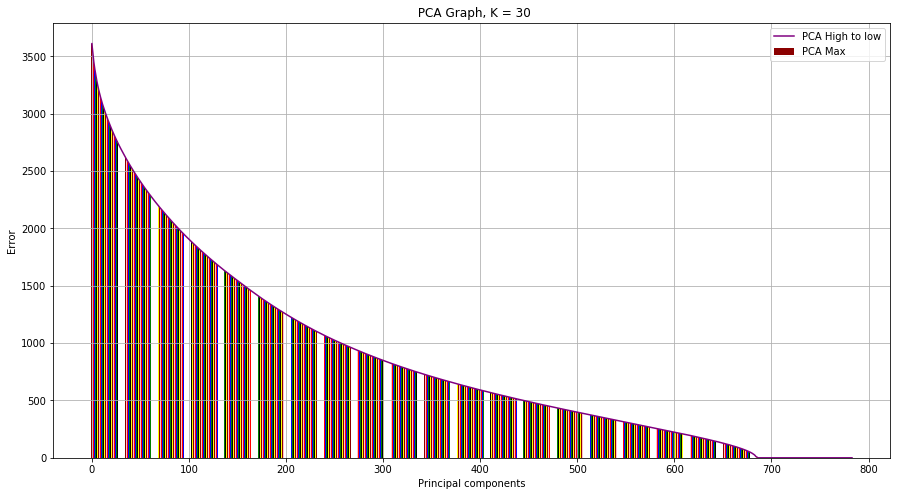

In [30]:
fig = plt.figure(figsize=(15,8))
plt.bar(range(len(Error)), Error, color=['darkred','pink','red','blue','green','black','yellow'],
        label='PCA Max')
plt.plot(range(len(Error)),Error,color = 'purple',label= 'PCA High to low')
plt.xlabel('Principal components')
plt.ylabel('Error')
plt.grid()
plt.title(' PCA Graph, K = 30')
plt.legend(loc='best')
plt.show()

## Explanation of Variance

In [0]:
lam_sum = sum(eigen_value)
explained_variance = [(lam_k/lam_sum)*100 for lam_k in sorted(eigen_value[0:300], reverse=True)]

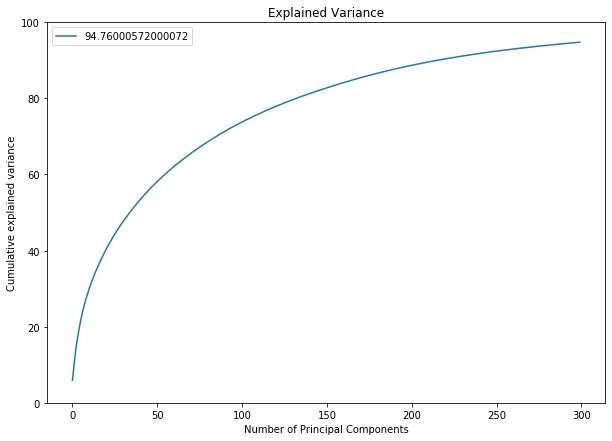

In [32]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.plot(np.cumsum(explained_variance), label = str(np.sum(explained_variance)))
ax1.set_ylim([0,100.0])
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative explained variance')
plt.legend(loc='best')
ax1.set_title('Explained Variance')
plt.show()

In [33]:
len(Error)

784

In [0]:
D = pd.DataFrame(np.array(Error).reshape(28,28))

In [35]:
D.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,3611.370767,3528.235370,3451.076278,3390.336397,3337.256798,3289.676430,3246.839474,3208.237482,3173.507134,3141.849265,3110.837657,3082.376231,3055.969779,3029.982812,3005.544294,2981.789612,2959.006415,2936.478436,2914.775455,2893.290522,2872.720645,2852.287849,2832.770271,2813.745629,2795.005233,2776.703539,2758.642287,2741.182933
1,2724.283812,2707.968078,2691.799194,2675.778807,2659.899966,2644.358379,2628.937883,2613.523185,2598.339280,2583.481052,2568.983851,2554.545384,2540.273911,2526.204280,2512.425751,2498.979743,2485.509494,2472.111473,2459.044323,2446.104730,2433.196749,2420.622592,2408.125536,2395.612878,2383.127970,2370.983010,2359.010299,2347.206640
2,2335.537412,2324.078231,2312.724052,2301.373187,2290.074801,2278.933744,2267.927102,2256.920356,2245.953122,2235.142110,2224.408972,2213.882507,2203.418296,2193.083679,2182.770344,2172.561492,2162.357139,2152.231911,2142.156308,2132.228939,2122.450826,2112.686683,2102.945687,2093.235351,2083.553018,2074.133570,2064.692848,2055.303376
3,2045.905311,2036.671127,2027.425784,2018.317820,2009.303062,2000.269071,1991.246009,1982.277083,1973.457241,1964.698425,1956.000324,1947.362865,1938.870320,1930.375087,1922.008637,1913.636854,1905.282426,1897.009264,1888.882735,1880.797644,1872.734498,1864.673829,1856.625282,1848.664333,1840.753975,1832.875686,1824.997069,1817.163139
4,1809.495973,1801.859146,1794.310661,1786.740581,1779.150766,1771.663503,1764.197815,1756.800391,1749.395715,1742.024107,1734.711669,1727.414269,1720.173553,1712.904899,1705.745048,1698.686772,1691.619384,1684.609761,1677.619394,1670.667565,1663.772862,1656.904074,1650.098414,1643.328767,1636.597161,1629.888183,1623.204234,1616.583964


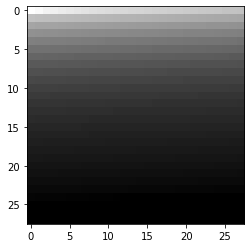

In [36]:
from matplotlib import pyplot as plt
plt.imshow(D.values, interpolation = "none",cmap = "gray")
plt.show()